In this notebook, I'm going to examine the 2017  <a href =https://insights.stackoverflow.com/survey> StackOverflow </a> survey data to answer socially sensitive questions about whether there is a pattern to be seen between the race or background of respondents and their income or expected income. 

### 1. Race Surveyed

In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.shape

(51392, 154)

In [3]:
#Check the column where respondents answer the question concerning their races
df2 = pd.read_csv('survey_results_schema.csv')
df2.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [4]:
#Check the specific question that participants answered for confirmation in the survey schema
df2[df2['Column'] =='Race']['Question']

147    Which of the following do you identify as?
Name: Question, dtype: object

In [5]:
race_count_val = df['Race'].value_counts();
race_count_val

White or of European descent                                                                                                              23415
South Asian                                                                                                                                2657
Hispanic or Latino/Latina                                                                                                                  1289
East Asian                                                                                                                                 1285
Middle Eastern                                                                                                                              899
                                                                                                                                          ...  
Black or of African descent; Hispanic or Latino/Latina; White or of European descent; I don’t know                                      

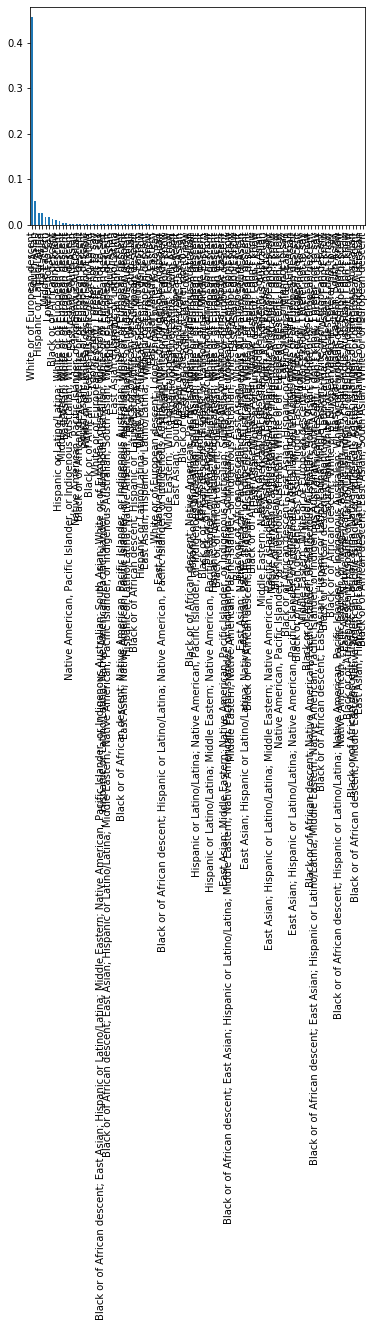

In [6]:
(race_count_val/df.shape[0]).plot(kind = 'bar')

There is a need to clean up this data so we can have a better perspective of the race distribution of the survey participants on stackoverflow.  

In [7]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

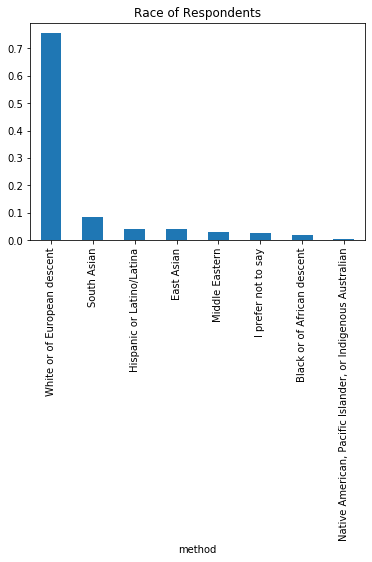

,count
method,
White or of European descent,0.755959
South Asian,0.086268
Hispanic or Latino/Latina,0.041335
East Asian,0.040135
Middle Eastern,0.028110
I prefer not to say,0.025588
Black or of African descent,0.019929
"Native American, Pacific Islander, or Indigenous Australian",0.002676


In [24]:
possible_race = ['White or of European descent', 'South Asian', 'Hispanic or Latino/Latina', 
                 'East Asian', 'Middle Eastern','Native American, Pacific Islander, or Indigenous Australian',
                 'I prefer not to say','Black or of African descent','I don\'t know']

def clean_and_plot(df, title='Race of Respondents', plot=True):
    '''
    INPUT 
        df - a dataframe holding the Race column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the Race column.
    '''
    race_group = df['Race'].value_counts().reset_index()
    race_group.rename(columns={'index': 'method', 'Race': 'count'}, inplace=True)
    race_group_df = total_count(race_group, 'method', 'count', possible_race)

    race_group_df.set_index('method', inplace=True)
    if plot:
        (race_group_df/race_group_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_race_group = race_group_df/race_group_df.sum()
    return props_race_group
    
props_df = clean_and_plot(df)
props_df

As seen, more than 70% of respondents to the Stackoverflow survey are of `White or of European descent`, about 13% of `Asian descent`, 2% of `Black or of African descent` and the lowest being from `Native American, Pacific Islander, or Indigenous Australian` at just 1% of the total. 

It is important we establish that the survey results is very likely not a true representation of the ethnic distribution in the tech industry as <a href= https://insights.stackoverflow.com/survey/2017#remote-work>80% of the survey respondents  are visitors to a stack exchange site. Also,only frequent visitors to stack overflow during the survey period were more likely to take the poll. </a> 

Thus, this analysis is simply taking a dive and presenting the results.

### 2. Race vs Salary
The participants provided data on their current or expected annual salary which Stack Overflow has helped to convert to US Dollars. If we're curious enough, how exactly does this annual income vary amongst the ethnic group represented? Is there a pattern we can immediately observe?

In [ ]:
def clean_race(race_item):
    possible_race = ['White or of European descent', 'South Asian', 'Hispanic or Latino/Latina', 
                 'East Asian', 'Middle Eastern','Native American, Pacific Islander, or Indigenous Australian',
                 'I prefer not to say','Black or of African descent','I don\'t know']
    '''
    INPUT
    race_item - line item of the dataframe column
    
    OUTPUT
    val - cleaned and streamlined data
    
    '''
    race_item = str(race_item)
    for val in possible_race:
        if val in race_item:
            return val 
        else:
            pass
df['Race'] = df['Race'].apply(clean_race)

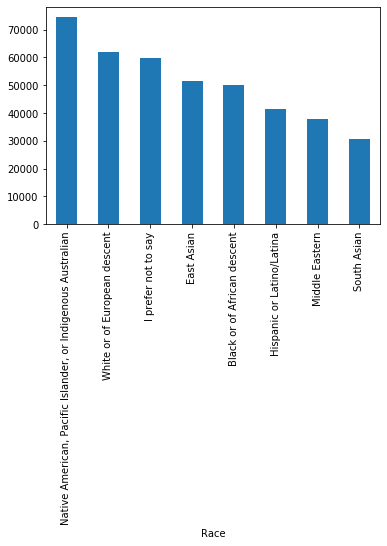

In [45]:
df.groupby('Race')['Salary'].mean().sort_values(ascending= False).plot(kind = 'bar');

- Even though the Native American, Pacific Islander, or Indigenous Australian have the lowest number of respondents, they are the only group earning above $70,000 on average - if you're feeling lost like I am, you can consider things like Years of Experience, Developer Type, and other geographical factors to get more insight into why this is the case. 

- Another curious case is that of the South Asian respondents. Even though they are the second highest respondents in the survey, we see that they earn the least at just about $30, 000 annually. 
Does this tell us something about the general income level of South Asians in the industry or can we say there is cheaper labour cost in South Asia? 

- Whichever is the case, this findings are drawn from data collated from just a sample of the developer population in these Ethnic groups. The reality could be very different. 

### 3. Race and Expected Salary of Students - a true measure of self-worth?

Since we also have post-graduation Expected Salary for students that were then learning how to code, we can get a better perspective of how students of each ethnic group percieve the future worth of their skills. 

In [36]:
list(df2[df2['Column'] == 'ExpectedSalary']['Question'])

['You said before that you are currently learning how to program. When you have completed your studies, what annual salary do you expect to earn in your first job after graduation?']

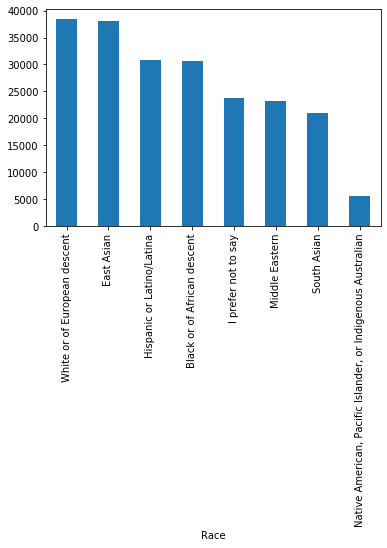

In [46]:
df.groupby('Race')['ExpectedSalary'].mean().sort_values(ascending = False).plot(kind = 'bar');

The student developers of White or of European descent and East Asian descents place a higher price on their skills relative to the rest of the population. These groups probably have a better perception of their worth on the market, but it could be that they understand the going rate for developers in their locations. 

Surprisingly, the surveyed students with Native American, Pacific Islander, or Indigenous Australian descent projected the lowest annual income of all ethnic groups. Our earlier findings about Professional developers from the same ethnic group show that they earn the most compared to other ethnic group. _Could there be a disconnect between the two groups or the data provided by respondents is the problem?_

Coming second-bottom on the expected salary list are the South Asians. The result is not surprising as it gives credence to the possibility of a generally lower income for South Asian developers compared with their counterparts. 

### 4. Highest Education of Parents vs Earnings - Are you likely to earn more if your parents have at least a Bachelor's degree?

Let's check if developers with parents with at least a bachelors degree tend to earn higher than their counterparts in the same ethnic group that are first generation students.

In [80]:
df['HighestEducationParents'].unique() #Check the list of highest parents education available

array(['High school', "A master's degree", 'A professional degree',
       'A doctoral degree', nan, "A bachelor's degree",
       "Some college/university study, no bachelor's degree",
       'I prefer not to answer', 'Primary/elementary school',
       "I don't know/not sure", 'No education'], dtype=object)

In [98]:
#Encode the data into first-generation degree holders and those with degree-holder parents

def higher_ed(parents_ed_str):
    '''
    INPUT
        parents_ed_str - a string of one of the values from the Highest Education of parents column
    
    OUTPUT
        return 1 if the string is  in ("A bachelor's degree", "A professional degree", "A doctoral degree",
        "A master's degree")
        return 0 otherwise
    '''
    if parents_ed_str in ("A bachelor's degree", "A professional degree", "A doctoral degree", "A master's degree"):
        return 0
    else:
        return 1

#Test your function to assure it provides 1 and 0 values for a copy of our df
df_new = df.copy()
df_new["HighestEducationParents"].apply(higher_ed)[:5]

0    1
1    0
2    0
3    0
4    1
Name: HighestEducationParents, dtype: int64

In [99]:
#Apply function to encode the column
df_new['HighestEducationParents'] = df_new["HighestEducationParents"].apply(higher_ed)

In [100]:
#We can choose to remove null values from Salary
#but what proportion of our respondents did not provide a salary?
prop_null = ((df_new['Salary'].isnull().sum()/df_new.shape[0])*100).round()
print( f'{prop_null} percent of respondents did not provide salary')

75.0 percent of respondents did not provide salary


In [101]:
#Drop any respondents without salary
no_null_salary_df = df_new.dropna(subset = ['Salary'])

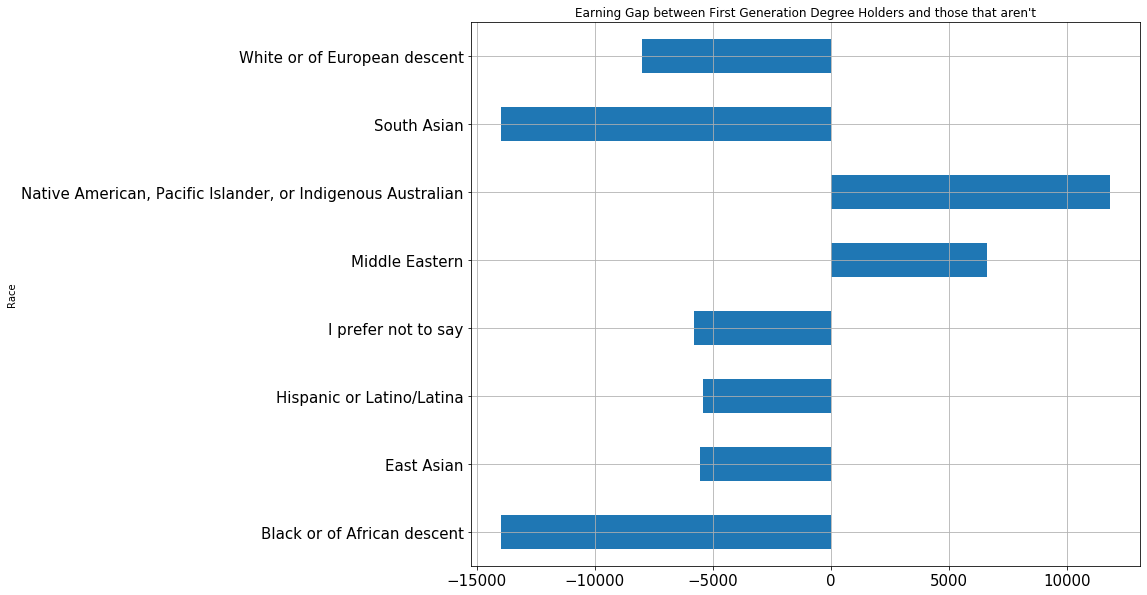

In [127]:
par_ed_1  = df_new[df_new['HighestEducationParents'] == 1] #Subset of dataframe that are first generation degree holders
par_ed_0 = df_new[df_new['HighestEducationParents'] == 0] #Subset of dataframe that are not first-generation degree holders

ed_1_mean = par_ed_1.groupby('Race')['Salary'].mean() #Average Salary of first_generation degree holders
ed_0_mean = par_ed_0.groupby('Race')['Salary'].mean() #Average Salary of non-first_generation degree holders

differ_ed_mean = ed_1_mean - ed_0_mean #Difference in average salary of first-generation degree holders and non-first generation degree holders
differ_ed_mean.plot(kind = 'barh', figsize = (12,10), grid = True, 
                    title = 'Earning Gap between First Generation Degree Holders and those that aren\'t' ,fontsize = 15)


The common social perception is that people with parents with at least a Bachelor's degree tend to do better in life and have higher income levels compared to everyone else.

The chart above confirms this as only people 